In [1]:
from homework import *

<Figure size 432x288 with 0 Axes>

> Note: The entire homework was implemented using Python3, matplotlib for plotting and numpy for algebraic tools.

## Tasks

1. (2p)  Run the simulations for different function classes - i.e. different feature functions use the Poly, the Harmonic, and the ReLU classes - and find

a) an explanation on which function class should be used


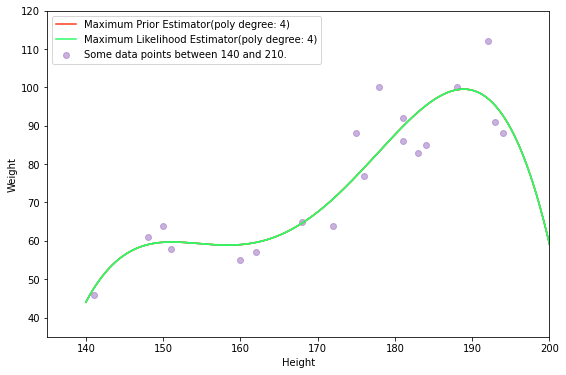

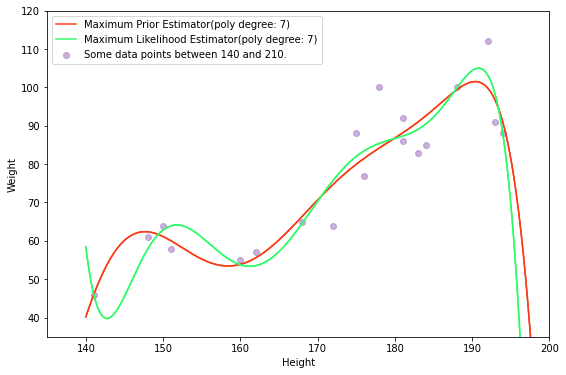

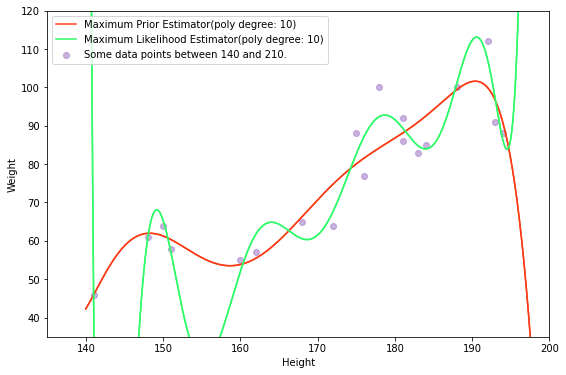

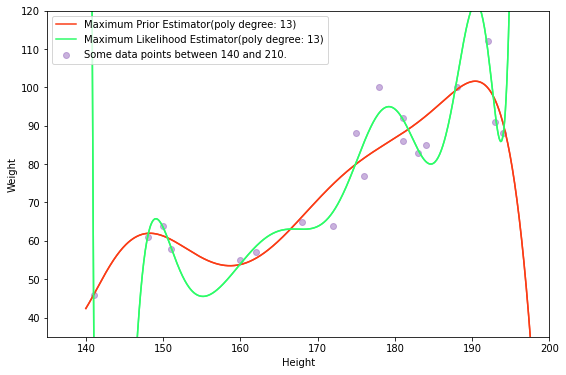

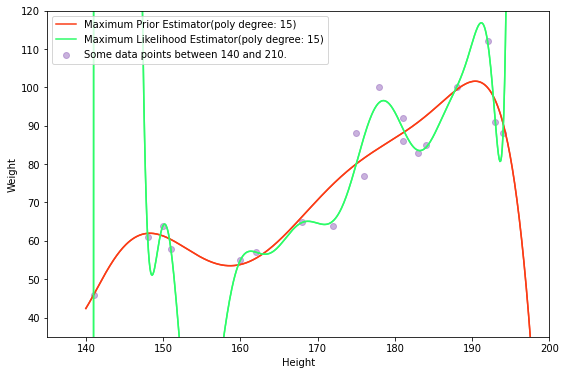

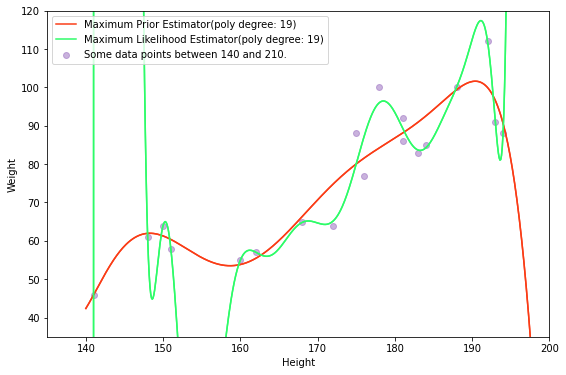

In [2]:
%matplotlib inline
poly_graphs()

In [3]:
poly_nrmse()

NRMSE: 
Poly feature function; degree: 4
MAP estimator; 	0.09362067745917566
MLE estimator; 	0.09362067745246246


Poly feature function; degree: 7
MAP estimator; 	0.08346951910868464
MLE estimator; 	0.07857246781952246


Poly feature function; degree: 10
MAP estimator; 	0.08328228038310467
MLE estimator; 	0.05460950400166848


Poly feature function; degree: 13
MAP estimator; 	0.08327984430434363
MLE estimator; 	0.047510028301302465


Poly feature function; degree: 15
MAP estimator; 	0.08327983884958742
MLE estimator; 	0.04195361879253415


Poly feature function; degree: 19
MAP estimator; 	0.0832798388185531
MLE estimator; 	0.04203655400072998




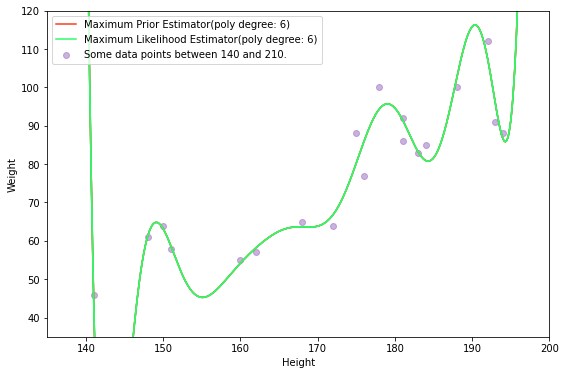

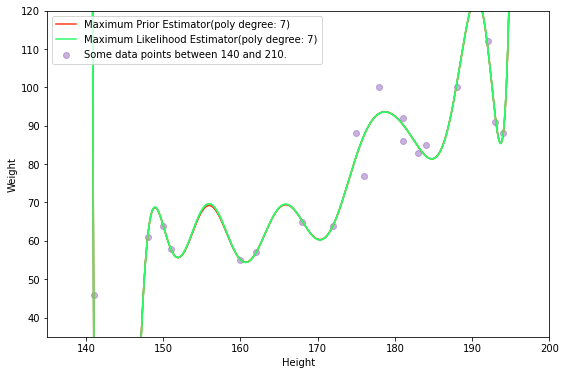

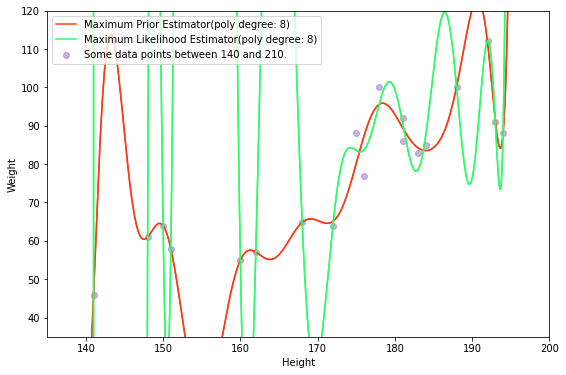

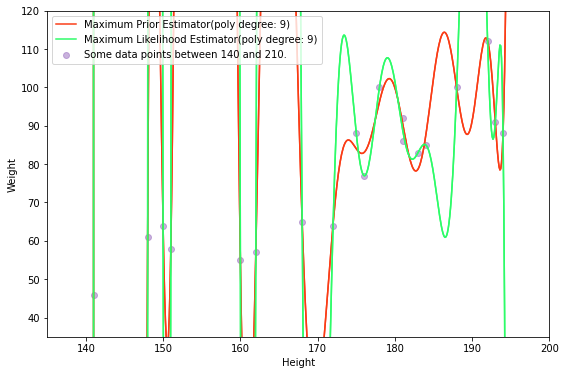

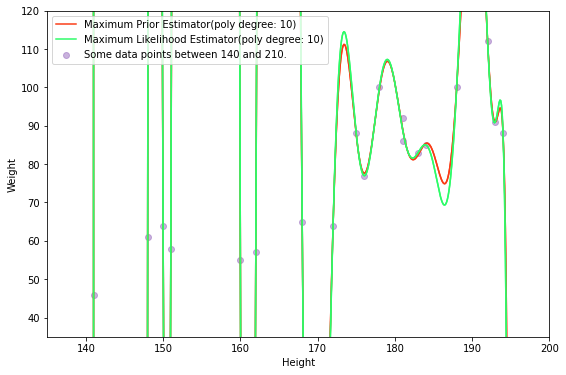

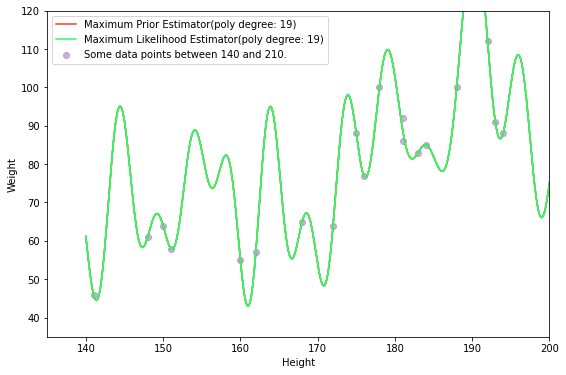

In [4]:
%matplotlib inline
harmon_graphs()

In [5]:
harmon_nrmse()

NRMSE: 
Harmon feature function; degree: 6
MAP estimator; 	0.04980903241179315
MLE estimator; 	0.0498090315683911


Harmon feature function; degree: 7
MAP estimator; 	0.044685963861330794
MLE estimator; 	0.044683843315235


Harmon feature function; degree: 8
MAP estimator; 	0.04295137560983842
MLE estimator; 	0.03407049416622054


Harmon feature function; degree: 9
MAP estimator; 	0.03166653675082602
MLE estimator; 	0.012563343756047094


Harmon feature function; degree: 10
MAP estimator; 	0.013020693711150414
MLE estimator; 	0.012563343756051856


Harmon feature function; degree: 19
MAP estimator; 	0.012563345382127207
MLE estimator; 	0.012563343756050902




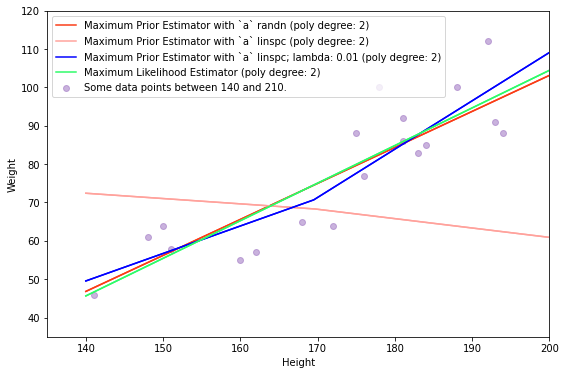

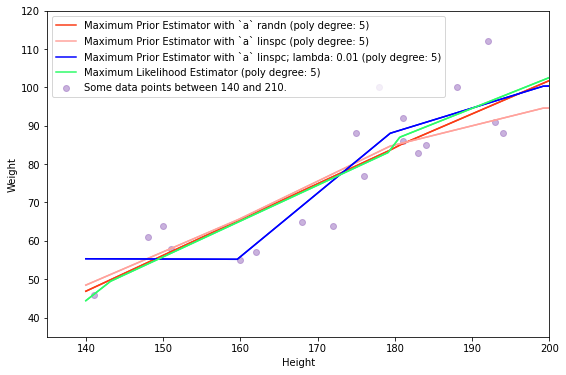

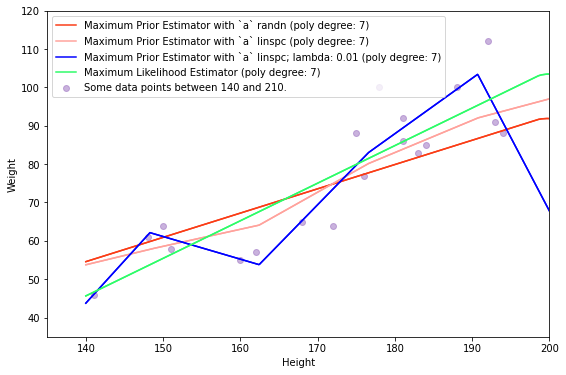

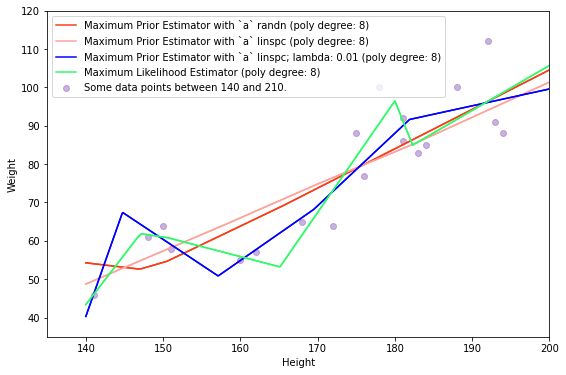

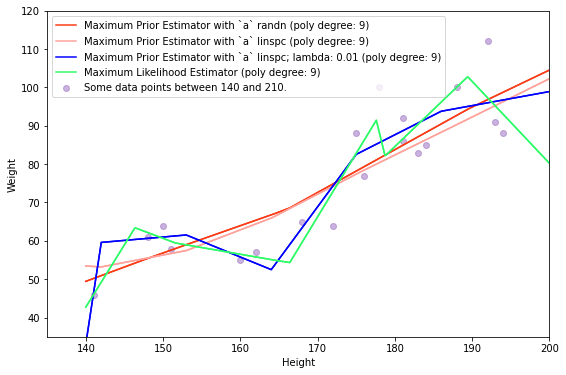

In [6]:
%matplotlib inline
relu_graphs()

In [7]:
relu_nrmse()

NRMSE: 
ReLu feature function; degree: 2
MAP estimator; randn params; 	0.1791941033665885
MAP estimator; linspace params; 	0.17892327865559035
MAP lambda estimator; linspace params; 	0.1283272880747496
MLE estimator; randn params; 	0.1695837691085805


ReLu feature function; degree: 5
MAP estimator; randn params; 	0.11150336157846936
MAP estimator; linspace params; 	0.13095297350539264
MAP lambda estimator; linspace params; 	0.10143049702202145
MLE estimator; randn params; 	0.10215745448410288


ReLu feature function; degree: 7
MAP estimator; randn params; 	0.11380008283424309
MAP estimator; linspace params; 	0.11253148408786902
MAP lambda estimator; linspace params; 	0.08452563932713446
MLE estimator; randn params; 	0.09948549708514673


ReLu feature function; degree: 10
MAP estimator; randn params; 	0.10645300799145628
MAP estimator; linspace params; 	0.11826091953108563
MAP lambda estimator; linspace params; 	0.08808418047409966
MLE estimator; randn params; 	0.0867456118786043


ReL

> Based on the observations made in the previous sections, The polynomial based estimator achieved the most satisfactory fit for the underlying nature of the data set given, but that is a subjective matter. Looking at the NRMSE, the harmonic function achieved better results, yet that is in part due to the overfitting. 

  b) explain whether are there "outliers" and if you remove them, what difference would it produce

In [8]:
comparative_nrmse()

Mean: 77.47368421052632, Variance: 17.869021771159485

Comp. NRMSE MAP poly[d: 2] improvement: -0.03497559394152086
Comp. NRMSE MAP harmon[d: 2] improvement: -0.03490441749122448
Comp. NRMSE MAP relu[d: 2] improvement: 0.01012724659758174


Mean: 77.47368421052632, Variance: 17.869021771159485

Comp. NRMSE MAP poly[d: 5] improvement: -0.03527185915519185
Comp. NRMSE MAP harmon[d: 5] improvement: -0.03110623271768957
Comp. NRMSE MAP relu[d: 5] improvement: -0.07435252005622103


Mean: 77.47368421052632, Variance: 17.869021771159485

Comp. NRMSE MAP poly[d: 7] improvement: -0.027587771274280783
Comp. NRMSE MAP harmon[d: 7] improvement: -0.02911717290204443
Comp. NRMSE MAP relu[d: 7] improvement: -0.010176243055725245


Mean: 77.47368421052632, Variance: 17.869021771159485

Comp. NRMSE MAP poly[d: 10] improvement: -0.02740410848896104
Comp. NRMSE MAP harmon[d: 10] improvement: 0.002548097990236583
Comp. NRMSE MAP relu[d: 10] improvement: -0.037927723894897666


Mean: 77.47368421052632, Va

> So, if the mean is 77 and the standard deviation is 18, as in the test dataset above, then all data in the sample between 59 and 96 will account for about 63% of the data sample. These results tell us that we have outliers, so let us try to remove them and see the effect.
>  - One easy to spot effect is that, given the size of the data set, removing some of the points will make the overfitting worse. 
>  - All the NRMSE results prove that removing the outliers we improve the fit of the curve, but we should not believe it when provided with such a small dataset.

2. (3p) Define the function class that is a subset of the ReLU function class, with all $b_j$ set to $+1$ - meaning that the approximation uses functions of the form:
$$
  f_\theta(x) = \theta_0 + 
   \sum_{k=1}^K \theta_k\mathrm{ReLU}\left( x - a_k\right)
$$

a) (1p) Define the function class as defined above. Interpret the values $a_k$ as "feature generators". Explain your thoughts.

In [9]:
"""
def ReLu_feature_function_bzero(X, degree, params, free_term=65):
    n = len(X)
    a = params['a']

    phi = []
    phi.append(np.array([free_term for _ in range(n)]))
    for k in range(1, degree+1):
        phi.append(ReLu((X - a[k])))
    return np.matrix(phi).T

estimator(map_w, ReLu_feature_function_bzero, X, Y, degree, params_randn, '#fa3c16', lbl='Maximum Prior Estimator with randn a')
"""

"\ndef ReLu_feature_function_bzero(X, degree, params, free_term=65):\n    n = len(X)\n    a = params['a']\n\n    phi = []\n    phi.append(np.array([free_term for _ in range(n)]))\n    for k in range(1, degree+1):\n        phi.append(ReLu((X - a[k])))\n    return np.matrix(phi).T\n\nestimator(map_w, ReLu_feature_function_bzero, X, Y, degree, params_randn, '#fa3c16', lbl='Maximum Prior Estimator with randn a')\n"

b) (2p) With randomly generated vectors $a_k$ from the interval $[120,220]$, provide an estimation procedure for the optimal values of $\theta_k$ - conditioned on $a_k$. Provide plot for different subsets and different number $K$ of features.

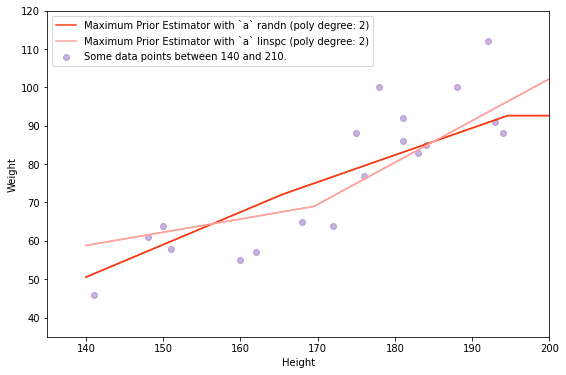

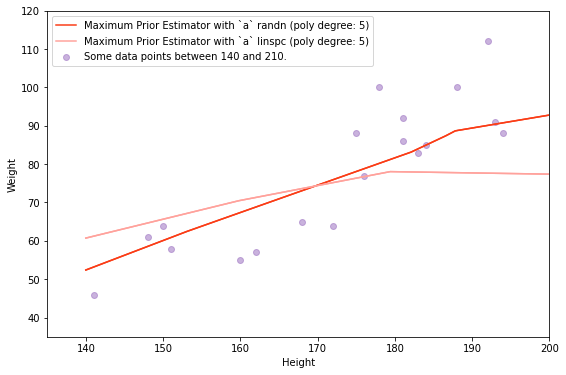

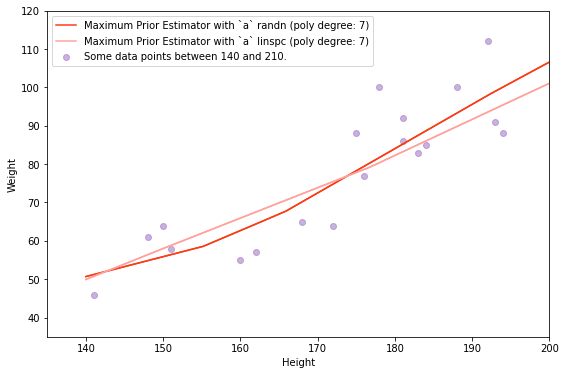

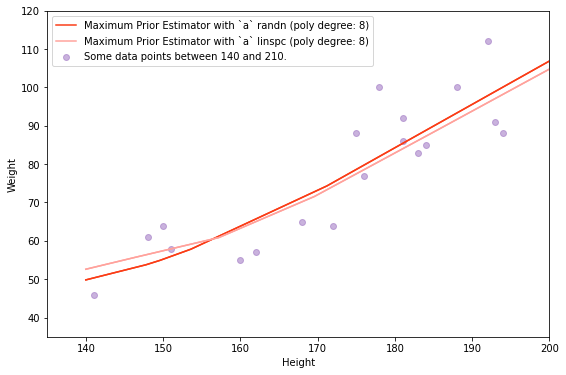

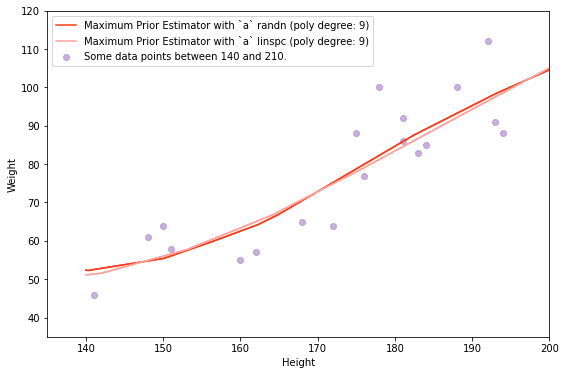

In [10]:
"""
    params_randn = {
        'a': [120 + 100 * x for x in np.random.rand(1, degree+1)[0]],
        'b': [positive_or_negative() for _ in range(degree+1)],
        'lambda': lmbda
    }
    
    def map_w(X, Y, degree, params):
        a = params['a']
        b = params['b']

        w = np.random.randn(1, degree+1)[0]
        sig_theta = np.sqrt(np.mean(abs(w - np.mean(w))**2))
        sig_noise = np.sqrt(np.mean(abs(a - np.mean(a))**2))

        phi = ReLu_feature_function(X, degree, params)
        icov_theta = ((sig_noise/sig_theta)**2) * np.eye(degree+1, degree+1)
        w_opt = np.dot(np.linalg.pinv(np.dot(phi.T, phi) + icov_theta), np.dot(phi.T, Y.reshape(Y.shape[0], 1)))
        return w_opt
"""

relu_graphs(which=[True, True, False, False, False])

3. (2p) We further restrict the function class by "standardising" the feature functions - i.e. the location of the vectors - for a number $K$ we define $[a_1,\ldots,a_k]$ as a uniform spacing of the interval $[120,220]$. Define ${\cal{F}}_K$ using the convention above.

In [11]:
"""
    params_linspc = {
        'a': np.arange(120, 220, (25.0/degree)),
        'b': [positive_or_negative() for _ in range(degree+1)],
        'lambda': lmbda
    }
"""

"\n    params_linspc = {\n        'a': np.arange(120, 220, (25.0/degree)),\n        'b': [positive_or_negative() for _ in range(degree+1)],\n        'lambda': lmbda\n    }\n"

4. (3p) Build a function that - based on the input parameters $K$ and $\lambda$ and the data-set - returns a prediction function:

a) For the given $K$ (degree) construct the function class;

In [12]:
"""
def ReLu_feature_function(X, degree, params, free_term=65):
    n = len(X)
    a = params['a']
    b = params['b']

    phi = []
    phi.append(np.array([free_term for _ in range(n)]))
    for k in range(1, degree+1):
        phi.append(ReLu(b[k] * (X - a[k])))
    return np.matrix(phi).T
"""

"\ndef ReLu_feature_function(X, degree, params, free_term=65):\n    n = len(X)\n    a = params['a']\n    b = params['b']\n\n    phi = []\n    phi.append(np.array([free_term for _ in range(n)]))\n    for k in range(1, degree+1):\n        phi.append(ReLu(b[k] * (X - a[k])))\n    return np.matrix(phi).T\n"

b) Build the MAP solution to find the optimal parameters using the regularisation parameter $\lambda$.

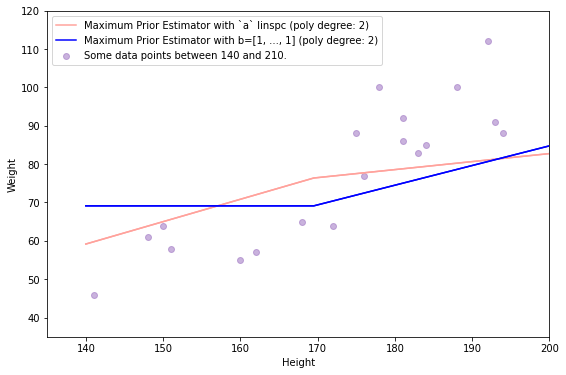

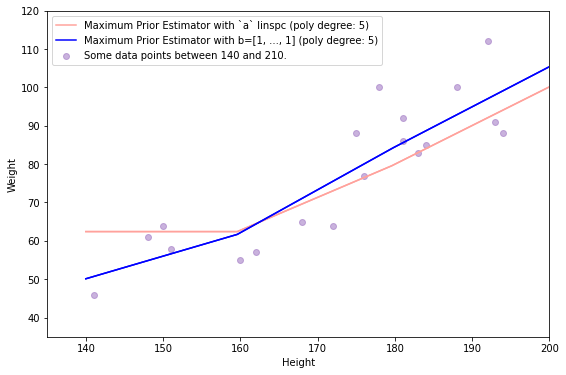

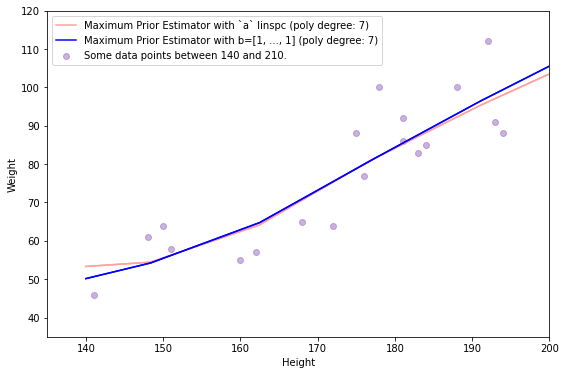

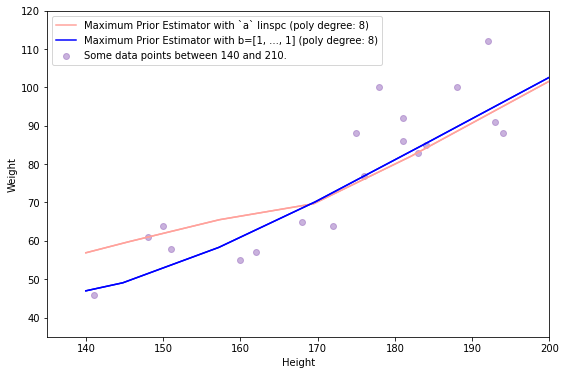

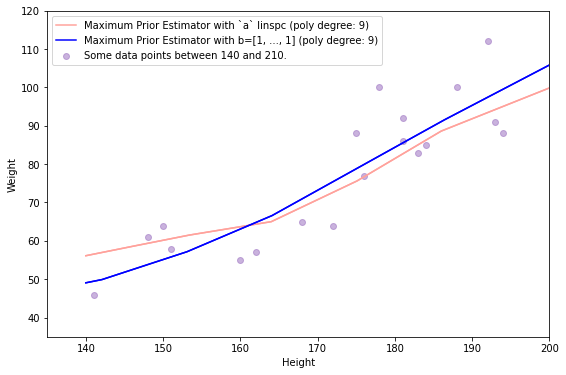

In [13]:
"""
def map_w_lambda(X, Y, degree, params):
    a = params['a']
    b = params['b']
    lmbda = params['lambda']

    phi = ReLu_feature_function(X, degree, params)
    icov_theta = lmbda * np.eye(degree+1, degree+1)
    w_opt = np.dot(np.linalg.pinv(np.dot(phi.T, phi) + icov_theta), np.dot(phi.T, Y.reshape(Y.shape[0], 1)))
    return w_opt
"""

relu_graphs(which=[False, True, False, False, True])

c) Build the graph measuring _training error_  - Z axis - for different values of $\lambda$ and $K$. 

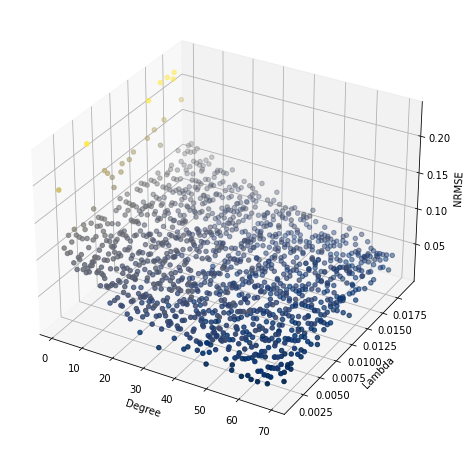

In [14]:
asgn_4c()